<a href="https://colab.research.google.com/github/MiguelAngel-ht/Machine_Learning_Algorithms-2021/blob/main/07-Perceptron-and-Multilayer-Perceptron-(MLP)/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Perceptron:**

A perceptron is the simplest form of a neural network, often used in binary classification problems. It consists of a single layer with input nodes connected to an output node, employing a step-like activation function. Weights are associated with the input features, and during the training process, these weights are adjusted to minimize the error between the predicted and actual outputs. The perceptron makes its predictions by weighing the input features, adding a bias, and then passing them through an activation function.

In [2]:
class Perceptron:
    """
    A basic implementation of the perceptron algorithm with NumPy optimizations
    """

    def __init__(self, w0=1, w1=0.1, w2=0.1):
        """
        Initializes the perceptron with given or default weights
        """
        self.weights = np.array([w0, w1, w2])  # Using NumPy array to store weights

    def step_function(self, z):
        """
        Activation function that returns 1 if input z is positive or zero,
        otherwise returns 0
        """
        return np.where(z >= 0, 1, 0)

    def weighted_sum_inputs(self, X):
        """
        Computes the weighted sum of the inputs using NumPy's dot product
        """
        return np.dot(X, self.weights)

    def predict(self, X):
        """
        Predicts the output using the step function
        """
        z = self.weighted_sum_inputs(X)
        return self.step_function(z)

    def predict_boundary(self, x):
        """
        Calculates the decision boundary of the classifier
        """
        # Get min and max values of the features and add some margin
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # Create meshgrid for feature ranges
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict class labels for each point in the meshgrid
        Z = self.predict(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        return xx, yy, Z

    def fit(self, X, y, epochs=1, step=0.1, verbose=True):
        """
        Trains the perceptron model given a dataset
        """
        # Ensuring that X has an additional column of ones for the bias term
        X = np.c_[np.ones((X.shape[0], 1)), X]
        errors = []  # To store the number of errors in each epoch

        for epoch in range(epochs):
            error = 0  # Counter to keep track of errors in each epoch
            for i in range(X.shape[0]):
                x_i = X[i]
                target = y[i]
                update = step * (target - self.predict(x_i))
                self.weights += update * x_i  # Updating weights using NumPy's broadcasting
                error += int(update != 0)  # Counting an error if update is non-zero
            errors.append(error)  # Appending the total error of this epoch to the errors list
            if error == 0:
              break
        print(f'Epoch: {epoch} - Error: {error}') #  - Errors from all epochs: {errors}

## **Multilayer Perceptron (MLP):**

In contrast, a multilayer perceptron (MLP) consists of multiple layers of nodes in a direct graph, with each layer fully connected to the next one. It includes an input layer, one or more hidden layers, and an output layer. Unlike the simple perceptron, MLP employs non-linear activation functions like sigmoid or ReLU, enabling it to solve complex, non-linear problems. The training occurs through a process called backpropagation, which utilizes gradient descent or variations of it to minimize the error and update the weights.

In [3]:
class MLP:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.001):
        self.lr = learning_rate

        self.weights_input_hidden1 = np.random.rand(input_size, hidden_size1)
        self.weights_hidden1_hidden2 = np.random.rand(hidden_size1, hidden_size2)
        self.weights_hidden2_output = np.random.rand(hidden_size2, output_size)

        self.bias_hidden1 = np.random.rand(hidden_size1)
        self.bias_hidden2 = np.random.rand(hidden_size2)
        self.bias_output = np.random.rand(output_size)

    def sigmoid(self, x):
        # Activation function (values in [0,1])
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivative of sigmoid function for backpropagation
        return x * (1 - x)

    def fit(self, X, y, epochs):

      for epoch in range(epochs):
          # Forward pass
          hidden1_layer_input = np.dot(X, self.weights_input_hidden1) + self.bias_hidden1
          hidden1_layer_output = self.sigmoid(hidden1_layer_input)

          hidden2_layer_input = np.dot(hidden1_layer_output, self.weights_hidden1_hidden2) + self.bias_hidden2
          hidden2_layer_output = self.sigmoid(hidden2_layer_input)

          output_layer_input = np.dot(hidden2_layer_output, self.weights_hidden2_output) + self.bias_output
          predicted_y = self.sigmoid(output_layer_input)

          # Compute the error
          error = y - predicted_y

          # Backward pass (backpropagation)
          d_predicted_y = error * self.sigmoid_derivative(predicted_y)

          error_hidden2_layer = d_predicted_y.dot(self.weights_hidden2_output.T)
          d_hidden2_layer = error_hidden2_layer * self.sigmoid_derivative(hidden2_layer_output)

          error_hidden1_layer = d_hidden2_layer.dot(self.weights_hidden1_hidden2.T)
          d_hidden1_layer = error_hidden1_layer * self.sigmoid_derivative(hidden1_layer_output)

          # Update the weights
          self.weights_hidden2_output += hidden2_layer_output.T.dot(d_predicted_y) * self.lr
          self.weights_hidden1_hidden2 += hidden1_layer_output.T.dot(d_hidden2_layer) * self.lr
          self.weights_input_hidden1 += X.T.dot(d_hidden1_layer) * self.lr

          self.bias_hidden1 += np.sum(d_hidden1_layer, axis=0) * self.lr
          self.bias_hidden2 += np.sum(d_hidden2_layer, axis=0) * self.lr
          self.bias_output += np.sum(d_predicted_y, axis=0) * self.lr

          # Print error at every 10 epochs
      #    if epoch % 100 == 0:
              # print(f"Error at epoch {epoch} is {np.mean(np.abs(error))}")

      # Last value only
      print(f"Error at epoch {epoch} is {np.mean(np.abs(error))}")

    def predict(self, X):
        hidden1_layer_input = np.dot(X, self.weights_input_hidden1) + self.bias_hidden1
        hidden1_layer_output = self.sigmoid(hidden1_layer_input)

        hidden2_layer_input = np.dot(hidden1_layer_output, self.weights_hidden1_hidden2) + self.bias_hidden2
        hidden2_layer_output = self.sigmoid(hidden2_layer_input)

        output_layer_input = np.dot(hidden2_layer_output, self.weights_hidden2_output) + self.bias_output
        predicted_y = self.sigmoid(output_layer_input)
        return predicted_y

    def predict_boundary(self, X):
        """
        Plot the decision boundary of the MLP by classifying a grid of values and plotting the results.
        """
        # Create a grid of values
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        # Classify each point in the grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        return xx, yy, Z

## **Difference in Classification:**

While a single-layer perceptron can only model linearly separable functions, an MLP can model complex, non-linear relationships, making it suited for a wider range of tasks, including those where the data is not linearly separable. In the context of classification, a perceptron struggles with problems where the decision boundary is not a straight line, while an MLP can find non-linear decision boundaries, offering a more flexible and powerful model, especially for complex datasets.

In [4]:
def create_data(n, noise):

      # Number of samples per class
      # n

      # Generate semicircles
      theta = np.linspace(0, np.pi, n)
      x = np.concatenate([np.cos(theta) - 0.5, np.cos(theta) + 0.5])
      y = np.concatenate([np.sin(theta), -np.sin(theta)])

      # Combine the data points of the two semicircles
      X = np.vstack((x,y)).T

      # Generate the labels for the two classes
      y = np.hstack((np.ones(n), -np.ones(n)))

      # Add noise to the data points to make the problem non-linear
      noise_strength = noise
      X += np.random.normal(scale=noise_strength, size=X.shape)

      # Plot the two semicircles
      plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='b', label='Class 1')
      plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='r', label='Class 2')
      plt.legend()
      plt.show()

      return X, y

In [5]:
def show_classification(X, y, xx, yy, Z, title):
    """
    Plot the classification results, decision boundary, and data points.

    Parameters:
    - X: The data points
    - y: The labels of the data points
    - xx: Meshgrid array for x-axis
    - yy: Meshgrid array for y-axis
    - Z: The classification results corresponding to the meshgrid
    - title: The title of the plot
    """
    plt.figure(figsize=(8,6))

    # Plotting the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')

    # Plotting the data points
    scatter = plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap='RdBu', edgecolor='k')

    # Adding labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

    # Adding a legend
    plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    #plt.legend()

    # Display the plot
    plt.show()

## Testing Linear Data

In [13]:
# Testing the MLP with random data
X = np.random.rand(100, 2)
y = np.where(np.sum(X, axis=1) > 1, 1, 0).reshape(-1, 1)  # Simple condition to create binary labels

Error at epoch 549 is 0.16734390727719467


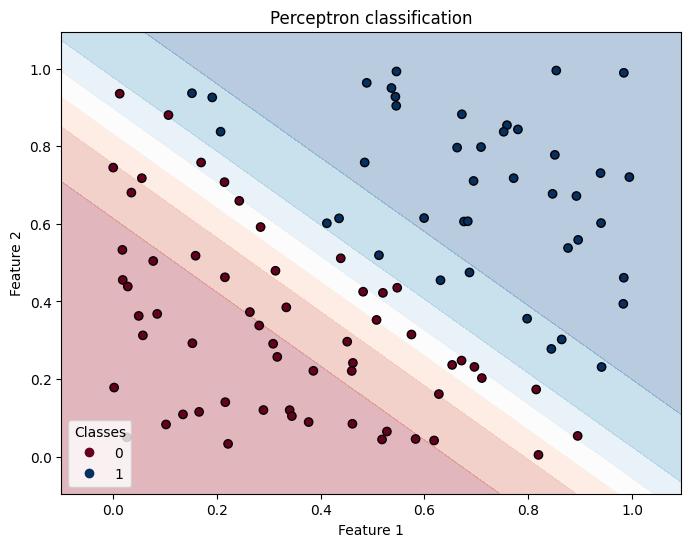

In [26]:
mlp = MLP(input_size=2, hidden_size1=2, hidden_size2=1, output_size=1, learning_rate=0.1)
mlp.fit(X, y, epochs=550)
xx, yy, Z = mlp.predict_boundary(X)

show_classification(X, y, xx, yy, Z, title = 'Perceptron classification')

Epoch: 10 - Error: 0


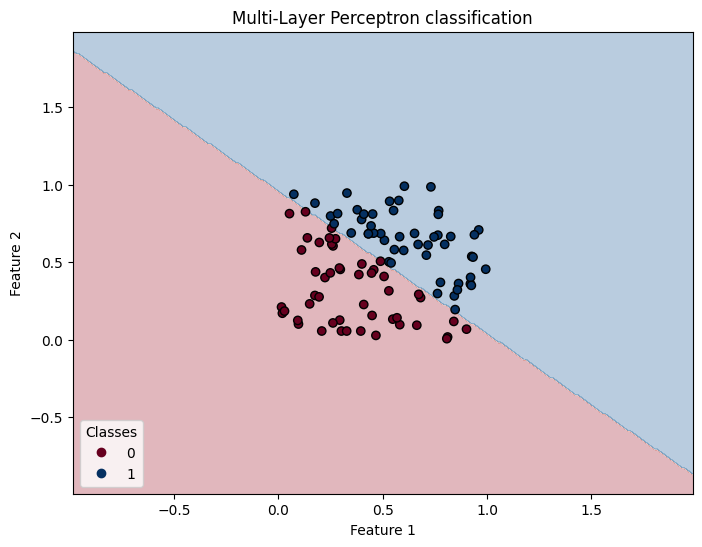

In [8]:
pct = Perceptron()
pct.fit(X, y, epochs=100, step=0.1)
xx, yy, Z = pct.predict_boundary(X)

show_classification(X, y, xx, yy, Z, title = 'Multi-Layer Perceptron classification')

## Testing NON-Linear Data

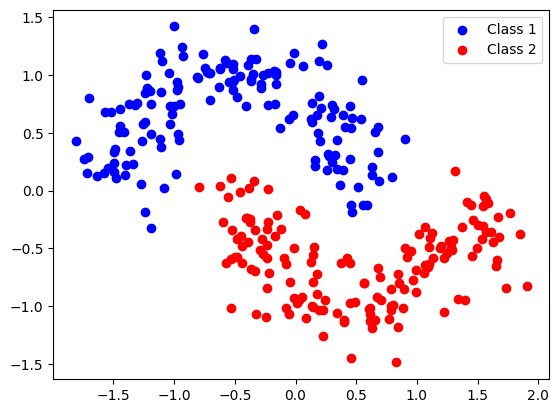

In [28]:
X ,y = create_data(150, 0.2)
y = y.reshape(-1,1)

Epoch: 99 - Error: 202


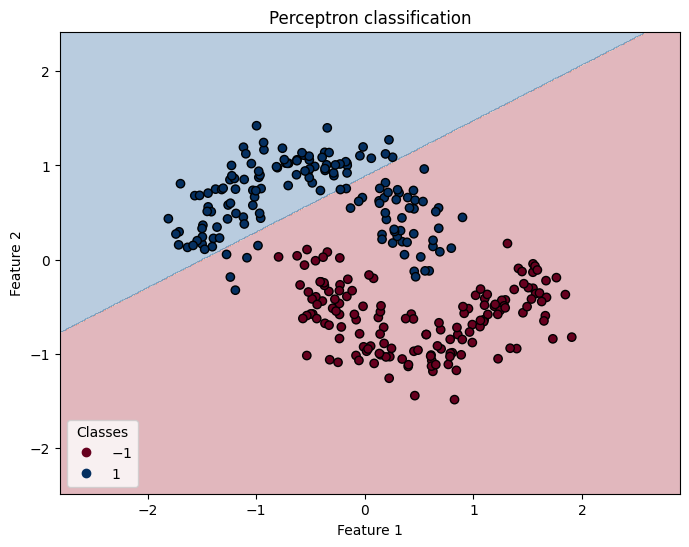

In [29]:
pct = Perceptron()
pct.fit(X, y, epochs=100, step=0.1)
xx, yy, Z = pct.predict_boundary(X)

show_classification(X, y, xx, yy, Z, title = 'Perceptron classification')

Error at epoch 999 is 0.505019007660524


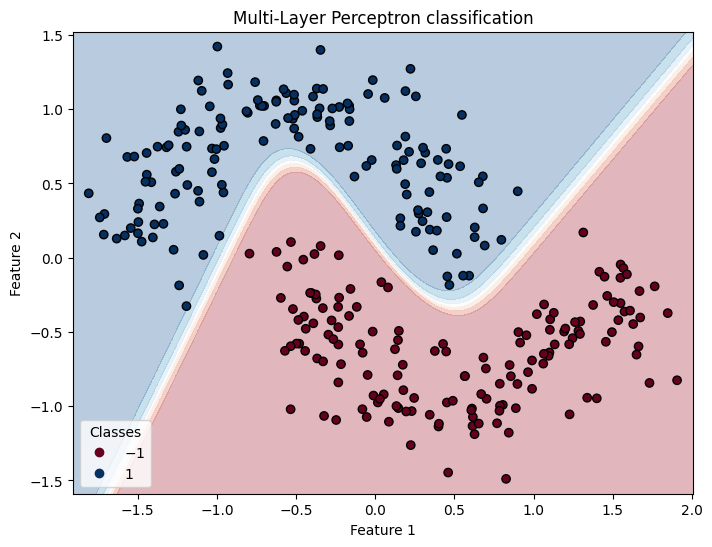

In [40]:
mlp = MLP(input_size=2, hidden_size1=4, hidden_size2=1, output_size=1, learning_rate=0.1)
mlp.fit(X, y, epochs=1000)
xx, yy, Z = mlp.predict_boundary(X)

show_classification(X, y, xx, yy, Z, title = 'Multi-Layer Perceptron classification')